In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import math
from scipy.stats import norm

In [126]:
# Define phase setup period
def update_theta_period(theta): # Should it be np.floor() instead of int()?
    if abs(theta[1])>=math.sqrt(3)*np.pi:
        theta=theta-np.floor(theta[1]/(math.sqrt(3)*np.pi))*np.array([np.pi,math.sqrt(3)*np.pi])
    theta[0]=theta[0]%(2*np.pi)
    return theta   

def update_theta_L(dt,theta_L,k_L,animal_v):
    theta_L=theta_L+k_L*animal_v*dt
    # theta_L=update_theta_period(theta_L) # Update towards the end
    return theta_L

def update_position(dt,x,g,animal_v):
    x = x + dt*g*animal_v
    x=x%400
    return x

def force_function(delta_theta):    
    if np.linalg.norm(delta_theta)<np.pi:
        if np.linalg.norm(delta_theta)==0:
            force_out=-delta_theta 
        else:
            force_out=-np.sin(np.linalg.norm(delta_theta))/np.linalg.norm(delta_theta)*delta_theta
    else:
        force_out=0
    return force_out

def update_theta_A(dt,theta_A,theta_L,k_A,animal_v,omega):
    theta_A=theta_A+dt*(k_A*animal_v+omega*force_function(theta_A-theta_L))
    # theta_A=update_theta_period(theta_A)
    return theta_A

def calc_coherence(animal_v,k_0,percent_loc,g,omega):
    D=-animal_v*k_0*percent_loc*(g-1)/omega
    return D


In [209]:
animal_v=np.array([3,3]) # Is velocity a scalar or a vector? -Here I use 2d vector.
grid_spacing=200
g=3
percent_loc=0.5
dt=1
omega=0.1
regularization=0.00001

k_0=np.array(2*[2*np.pi/grid_spacing])
k_L=g*k_0
k_A=k_0*(1+(g-1)*(1-percent_loc))
k_0

array([0.03141593, 0.03141593])

In [210]:
D = calc_coherence(animal_v,k_0,percent_loc,g,omega)
print(f'Decoherence number is {D}')
np.linalg.norm(D)

Decoherence number is [-0.9424778 -0.9424778]


1.33286488144751

In [211]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


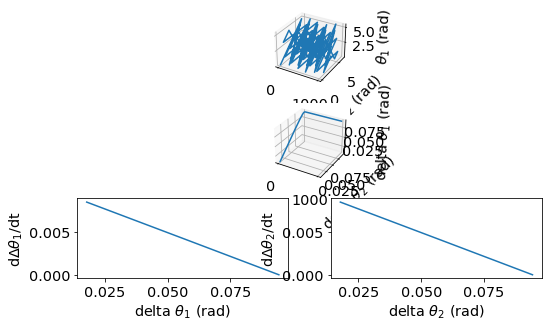

In [266]:
g=[1]
for i in range(len(g)):
    
    k_0=np.array(2*[2*np.pi/grid_spacing])
    k_L=g[i]*k_0
    k_A=k_0*(1+(g[i]-1)*(1-percent_loc))
     
    theta_A = np.array([0,0])
    theta_L = np.array([0,0])
    delta_theta = np.array([0,0])
    x=np.array([0,0]) # Is position just a scalar or a vector?

    theta_A_t = []
    theta_L_t = []
    delta_theta_t=[]
    x_t = []

    for t in range(1000):
        theta_L = update_theta_L(dt,theta_L,k_L,animal_v)
        theta_A = update_theta_A(dt,theta_A,theta_L,k_A,animal_v,omega)
    
        delta_theta=theta_A-theta_L
        #print(delta_theta)
        delta_theta_t.append(update_theta_period(delta_theta))
        
        theta_L_t.append(update_theta_period(theta_L))
        theta_A_t.append(update_theta_period(theta_A))
    
        x=update_position(dt,x,g[i],animal_v)
        x_t.append(x)

    D = calc_coherence(animal_v,k_0,percent_loc,g[i],omega)

    fig = plt.figure(figsize=plt.figaspect(0.6))
    # gs = gridspec.GridSpec(3, 2, figure=fig)
    
    ax = fig.add_subplot(3,1,1,projection='3d')
    theta_A_t=np.array(theta_A_t)
    # ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.3, 0.3, 1]))
    ax.plot(dt*np.arange(1000),theta_A_t[:,0],theta_A_t[:,1])
    ax.set_xlabel('t')
    ax.set_ylabel('$\\theta_{2}$ (rad)')
    ax.set_zlabel('$\\theta_{1}$ (rad)')

    ax1 = fig.add_subplot(3,1,2,projection='3d')
    delta_theta_t=np.array(delta_theta_t)
    # ax1.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.3, 0.3, 1]))
    ax1.plot(dt*np.arange(1000),delta_theta_t[:,0],delta_theta_t[:,1])
    ax1.set_xlabel('t')
    ax1.set_ylabel('delta $\\theta_{2}$ (rad)')
    ax1.set_zlabel('delta $\\theta_{1}$ (rad)')
    
    
    delta_theta_t=np.array(delta_theta_t)
    
    ax2 = fig.add_subplot(3,2,5)
    delta_theta_diff1 = np.diff(delta_theta_t[:,0])
    ax2.plot(delta_theta_t[1:,0],delta_theta_diff1)
    ax2.set_ylabel('d$\Delta\\theta_{1}$/dt')
    ax2.set_xlabel('delta $\\theta_{1}$ (rad)')

    ax3 = fig.add_subplot(3,2,6)
    delta_theta_diff2 = np.diff(delta_theta_t[:,1])
    ax3.plot(delta_theta_t[1:,1],delta_theta_diff2)
    ax3.set_ylabel('d$\Delta\\theta_{2}$/dt')
    ax3.set_xlabel('delta $\\theta_{2}$ (rad)')
    

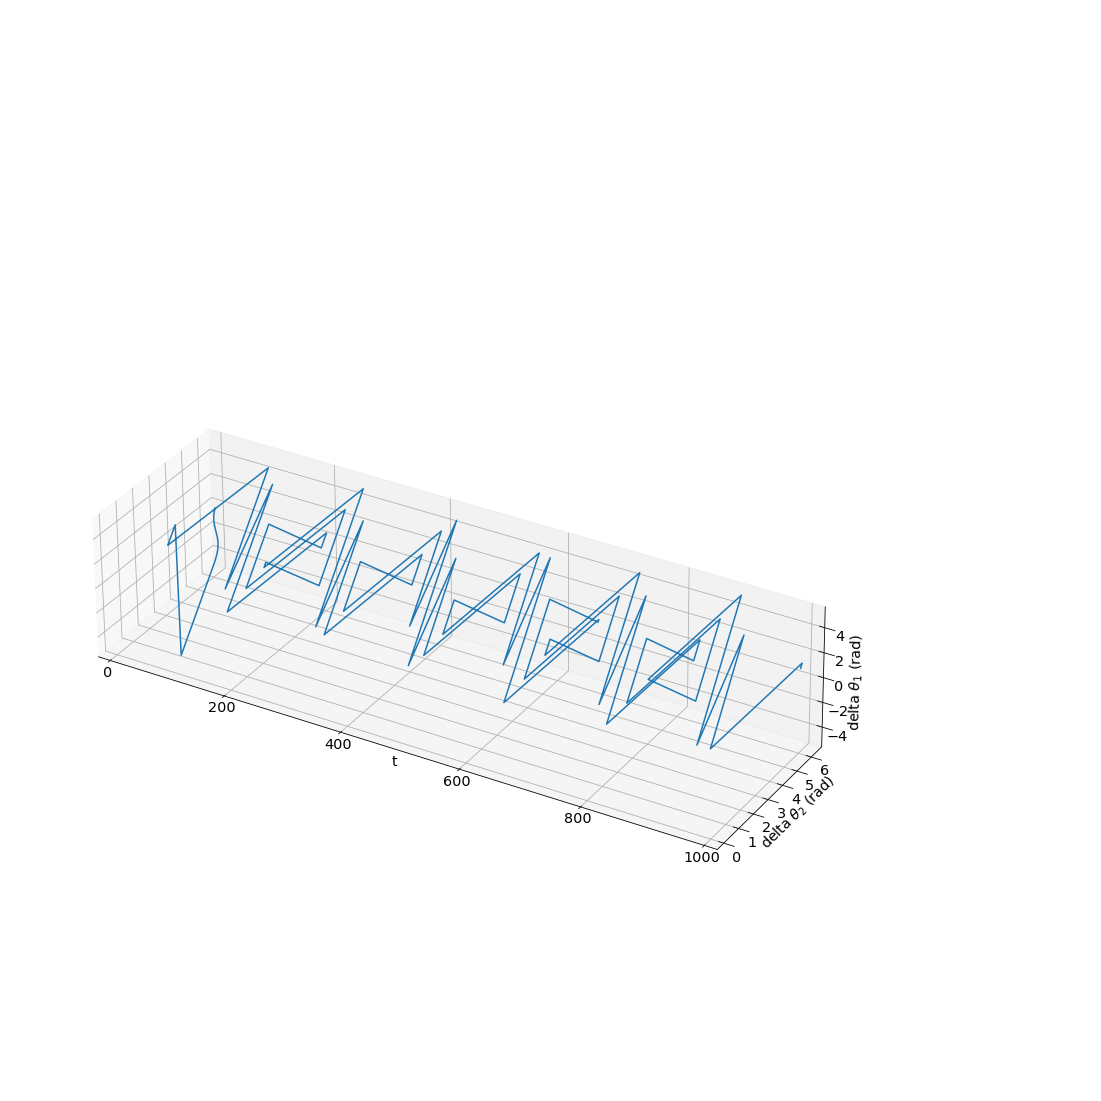

In [215]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

delta_theta_t=np.array(delta_theta_t)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.3, 0.3, 1]))
ax.plot(dt*np.arange(1000),delta_theta_t[:,0],delta_theta_t[:,1])
ax.set_xlim3d([0, 1000])
#ax.set_ylim3d([0, 6])
#ax.set_zlim3d([-3,3])
ax.set_xlabel('t')
ax.set_ylabel('delta $\\theta_{2}$ (rad)')
ax.set_zlabel('delta $\\theta_{1}$ (rad)')

# fig.savefig('Figures/3_2.jpg')

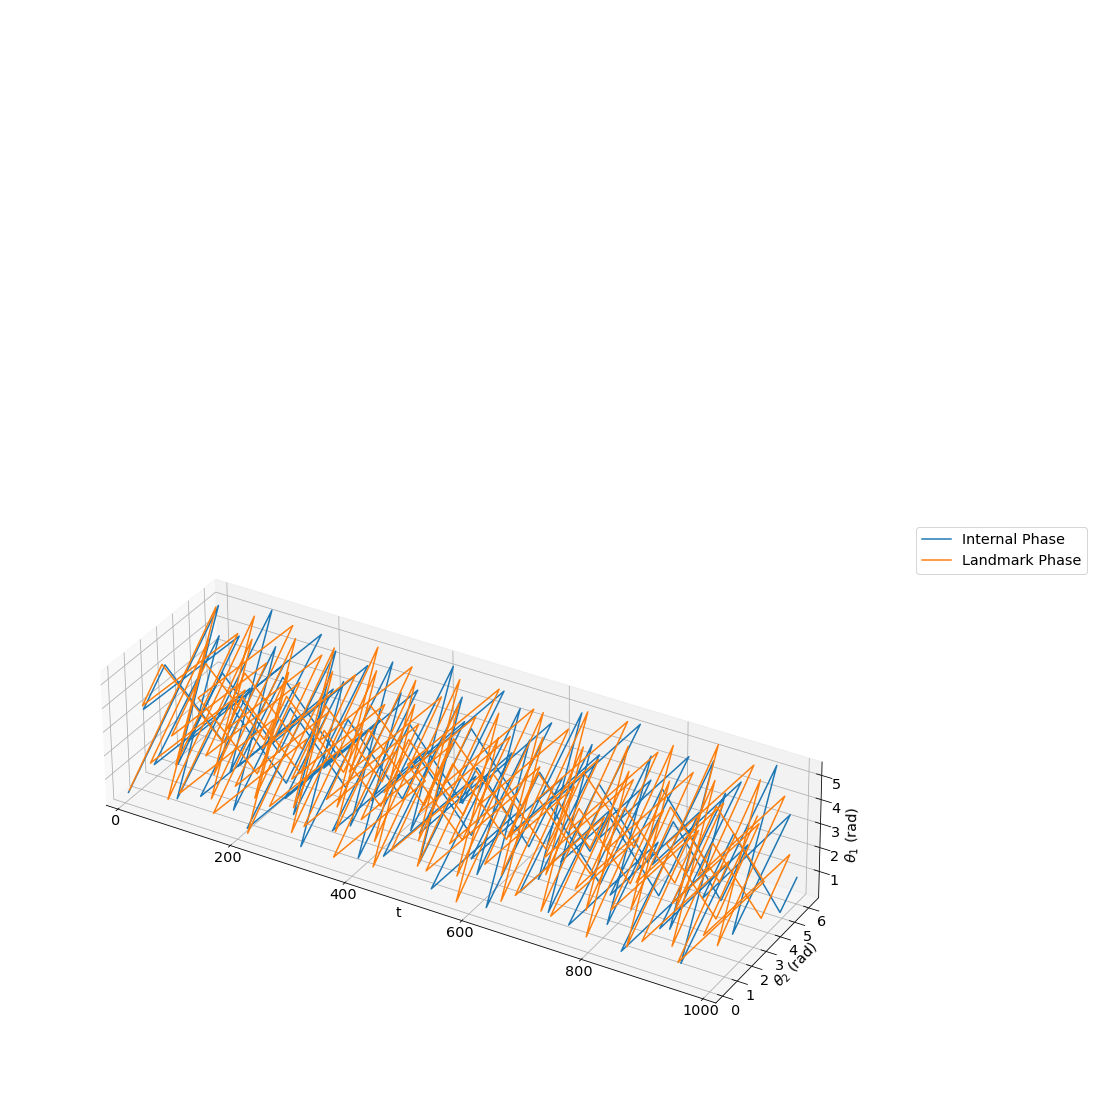

In [222]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

theta_A_t=np.array(theta_A_t)
theta_L_t=np.array(theta_L_t)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.3, 0.3, 1]))
ax.plot(dt*np.arange(1000),theta_A_t[:,0],theta_A_t[:,1],label = 'Internal Phase')
ax.plot(dt*np.arange(1000),theta_L_t[:,0],theta_L_t[:,1],label = 'Landmark Phase')
ax.set_xlim3d([0, 1000])
# ax.set_ylim3d([0, 10])
# ax.set_zlim3d([-5,5])
ax.legend(loc='right')
ax.set_xlabel('t')
ax.set_ylabel('$\\theta_{2}$ (rad)')
ax.set_zlabel('$\\theta_{1}$ (rad)')
# fig.tight_layout()
# fig.savefig('Figures/3_1.jpg')

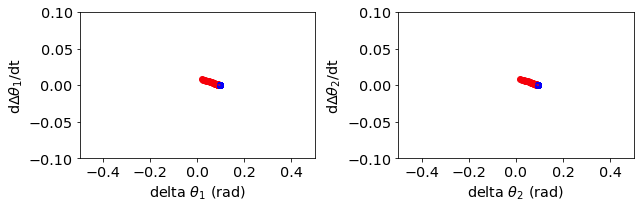

In [267]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[9, 3])
delta_theta_diff1 = np.diff(delta_theta_t[:,0])
delta_theta_diff2 = np.diff(delta_theta_t[:,1])
T=np.linspace(0.2,1,np.size(delta_theta_diff1))**2
s=10
for i in range(0,np.size(delta_theta_diff1)-s,s):
    ax2.plot(delta_theta_t[i+1:i+s+1,0],delta_theta_diff1[i:i+s],'-',color=(1-T[i],0 ,T[i]),alpha=0.3)
    ax2.scatter(delta_theta_t[i+1:i+s+1,0],delta_theta_diff1[i:i+s],color=(1-T[i],0 ,T[i]))
    ax2.set_ylabel('d$\Delta\\theta_{1}$/dt')
    ax2.set_xlabel('delta $\\theta_{1}$ (rad)')
    ax2.set_xlim([-0.5, 0.5])
    ax2.set_ylim([-0.1, 0.1])

for i in range(0,np.size(delta_theta_diff1)-s, s):
    ax3.plot(delta_theta_t[i+1:i+s+1,1],delta_theta_diff2[i:i+s],'-',color=(1-T[i],0 ,T[i]),alpha=0.3)
    ax3.scatter(delta_theta_t[i+1:i+s+1,1],delta_theta_diff2[i:i+s],color=(1-T[i],0 ,T[i]))
    ax3.set_ylabel('d$\Delta\\theta_{2}$/dt')
    ax3.set_xlabel('delta $\\theta_{2}$ (rad)')
    ax3.set_xlim([-0.5, 0.5])
    ax3.set_ylim([-0.1, 0.1])


fig.tight_layout()


fig.savefig('Figures/1.3.jpg')

In [225]:
np.size(delta_theta_diff10

999

In [ ]:
ax.plot(deltaPhi_ad[i:i+s+1],deltaPhi_diff[i:i+s+1],'-',color=(1-T[i],0,T[i]), alpha=0.3)
ax.scatter(deltaPhi_ad[i:i+s+1],deltaPhi_diff[i:i+s+1],color=(1-T[i],0,T[i]))